Robustness check - #top HVGs
---
We check robustness with respect to the main methods parameters:

- `n_top_genes`: number of highly variable genes, used in `scv.pp.filter_genes_dispersion`.

To asses robustness, we use correlation between lineage probabiliteis as metric. We fix the states we are interested in to the main endpoints in this system, i.e. Alpha, Beta and Epsilon states. For each paramater combination, we record the lineage probabilities and correlate all against all. We visualize the results in heatmaps. 

# Preliminaries

## Import packages

In [1]:
# import standard packages
from pathlib import Path
import sys

import pandas as pd
import cloudpickle as pickle

# import single-cell packages
import scvelo as scv
import scanpy as sc
import cellrank as cr

from utils.utils import run_analysis 

## Print package versions for reproducibility

In [2]:
cr.logging.print_versions()

cellrank==1.0.0-rc.12 scanpy==1.6.0 anndata==0.7.4 numpy==1.19.2 numba==0.51.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.2 scvelo==0.2.2 pygam==0.8.0 matplotlib==3.3.2 seaborn==0.11.0


## Set up paths

In [3]:
sys.path.insert(0, "../../..")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, CACHE_DIR

## Set up caching

Note: we use a caching extension called `scachepy` for this analysis, see [here](https://github.com/theislab/scachepy). We do this to speed up the runtime of this notebook by avoiding the most expensive computations. Below, we check whether you have scachepy installed and if you don't, then we automatically recompute all results. 

In [4]:
try:
    import scachepy
    c = scachepy.Cache(CACHE_DIR / "robustness" / "n_top_hvgs" , separate_dirs=True)
except ImportError:
    c = None
    
use_caching = c is not None
c

Cache(root=/home/icb/marius.lange/python_projects/cellrank_reproducibility/cache/robustness/n_top_hvgs, ext='.pickle', compression='None')

## Load the data

In [5]:
adata = cr.datasets.pancreas(DATA_DIR / "pancreas" / "pancreas.h5ad")
adata.raw = adata.copy()
adata

AnnData object with n_obs × n_vars = 2531 × 27998
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime'
    var: 'highly_variable_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'day_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

### Load terminal states annotations

In [6]:
term_states = pd.read_csv(DATA_DIR / "pancreas" / "annotations" / "terminal_states.csv", index_col=0)['0']
term_states = term_states.astype('category')
term_states

index
AAACCTGAGAGGGATA-1-3    NaN
AAACCTGAGGCAATTA-1-3    NaN
AAACCTGGTAAGTGGC-1-3    NaN
AAACCTGTCCCTCTTT-1-3    NaN
AAACGGGAGTAGCGGT-1-3    NaN
                       ... 
TTTGGTTTCCTTTCGG-1-3    NaN
TTTGTCAAGAATGTGT-1-3    NaN
TTTGTCAAGTGACATA-1-3    NaN
TTTGTCATCGAATGCT-1-3    NaN
TTTGTCATCTGTTTGT-1-3    NaN
Name: 0, Length: 2531, dtype: category
Categories (4, object): ['Alpha', 'Beta', 'Delta', 'Epsilon']

# Perturbing `n_top_genes`

## Non-fixed terminal states

### Deterministic mode

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
No cache found in `pars_knn_30_npcs_30_percd_1_nhvg_1000_minsc_20.pickle`, computing values.
recovering dynamics
    finished (0:07:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure 

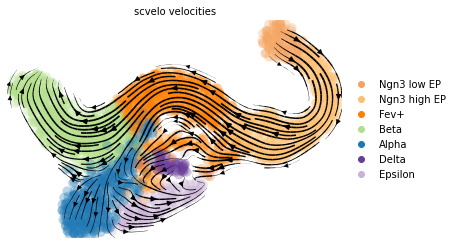

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


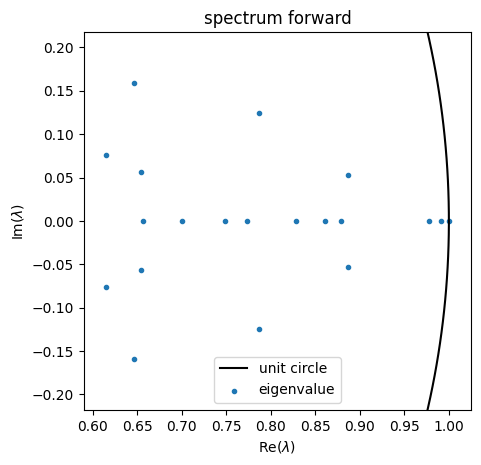

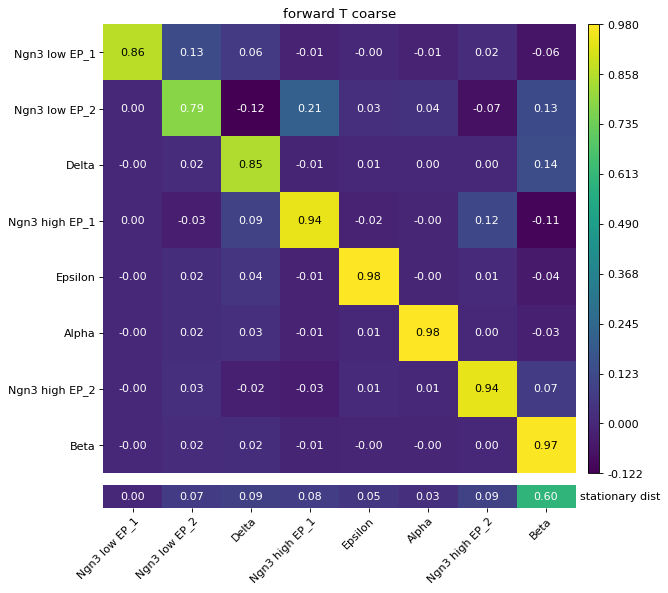

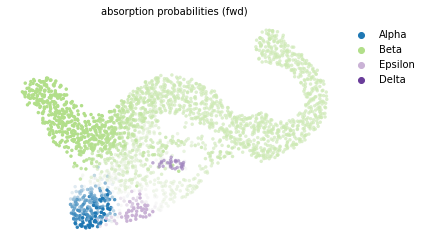

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


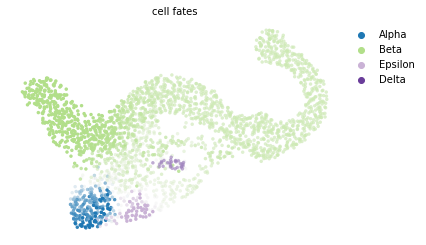

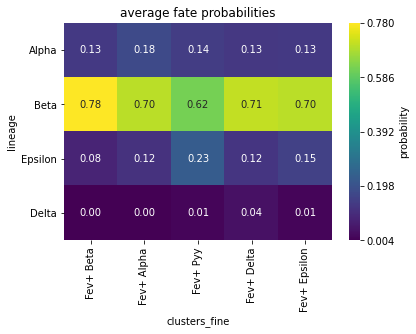

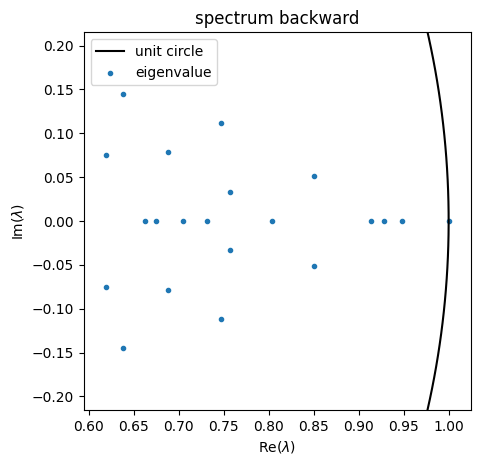

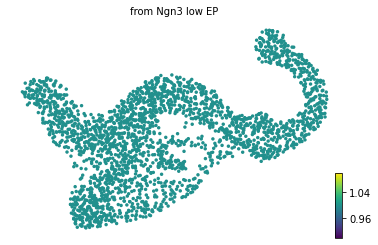

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


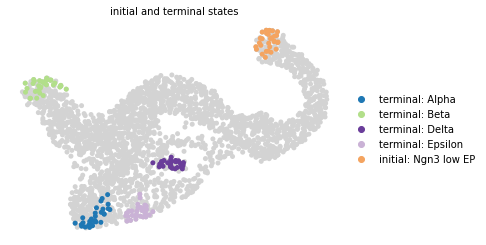

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
No cache found in `pars_knn_30_npcs_30_percd_1_nhvg_1500_minsc_20.pickle`, computing values.
recovering dynamics
    finished (0:10:18) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure 

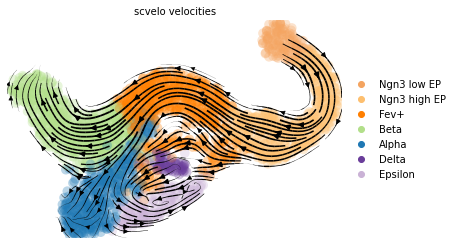

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


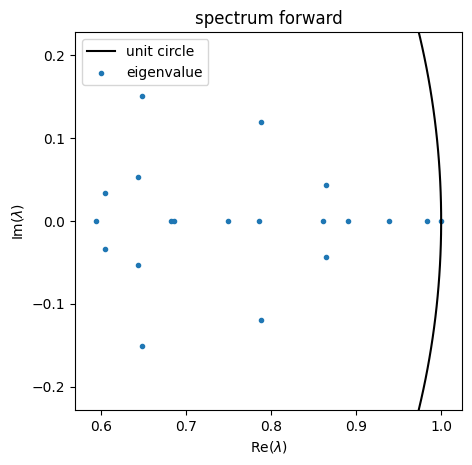

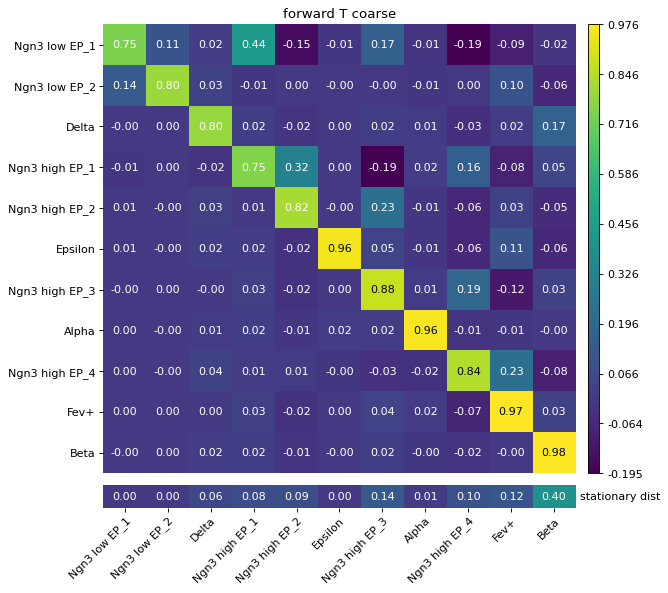

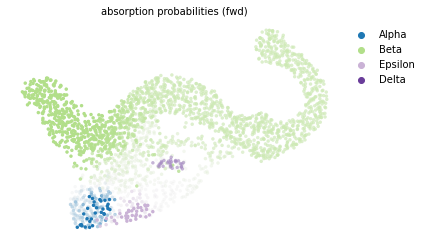

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


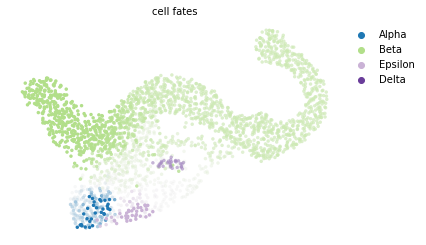

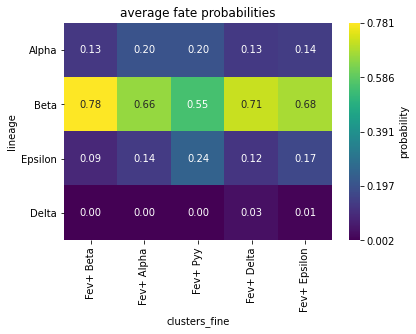

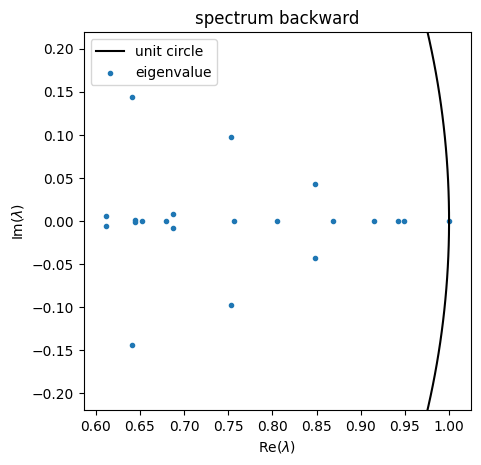

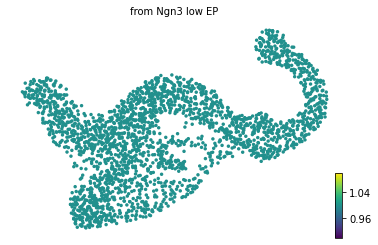

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


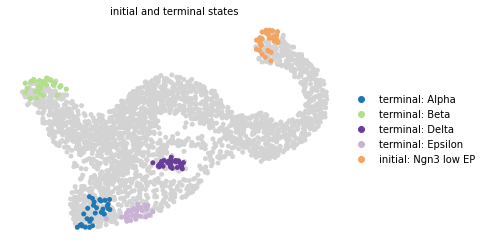

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
No cache found in `pars_knn_30_npcs_30_percd_1_nhvg_2000_minsc_20.pickle`, computing values.
recovering dynamics
    finished (0:11:01) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure 

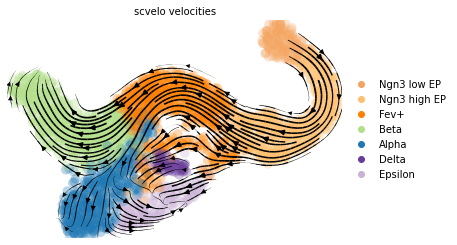

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


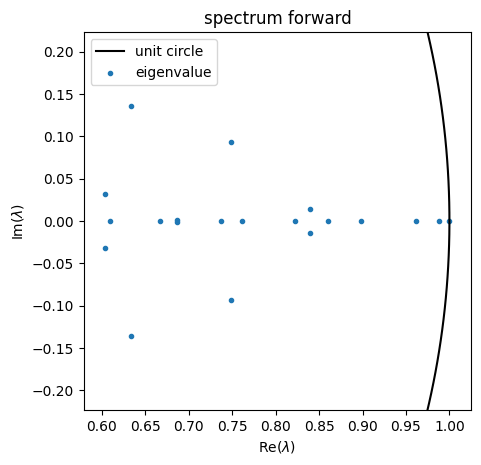

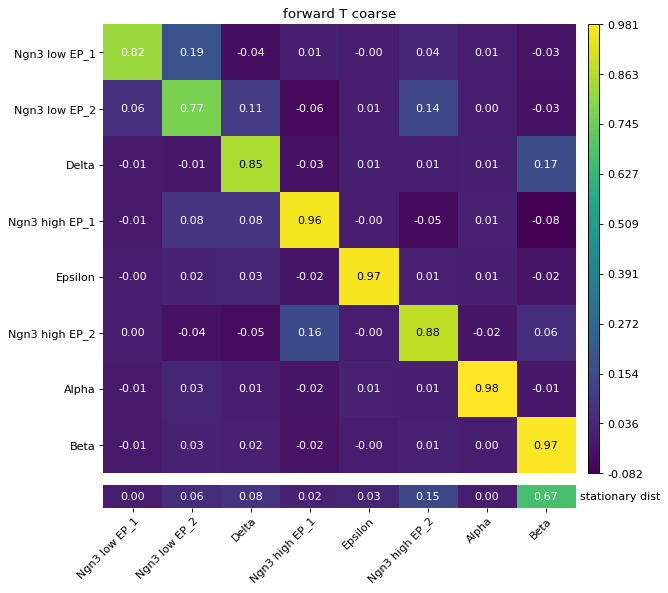

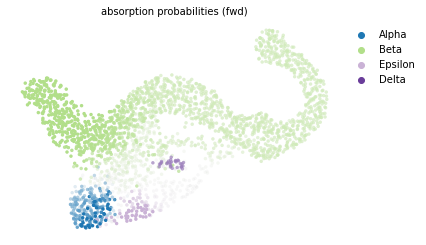

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


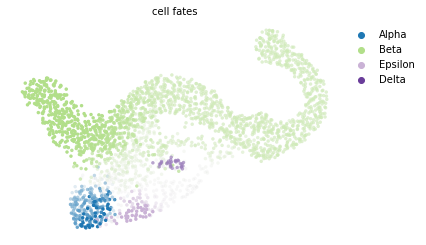

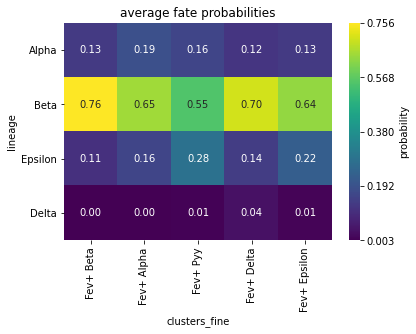

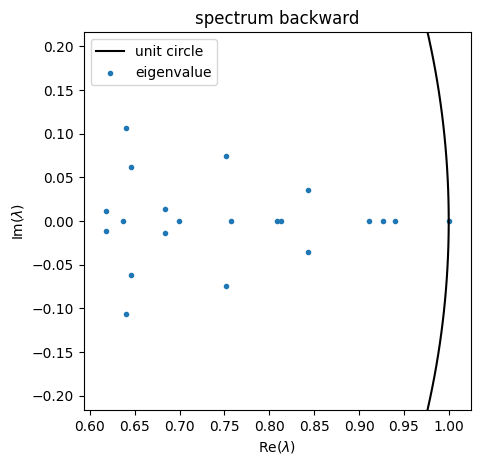

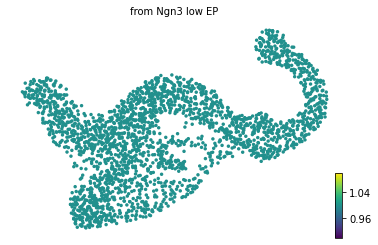

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


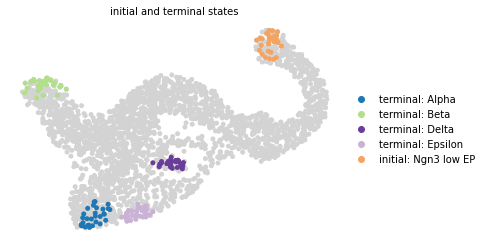

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
No cache found in `pars_knn_30_npcs_30_percd_1_nhvg_2500_minsc_20.pickle`, computing values.
recovering dynamics
    finished (0:12:43) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure 

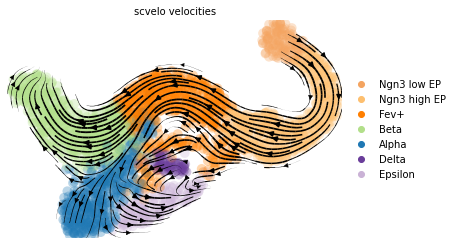

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


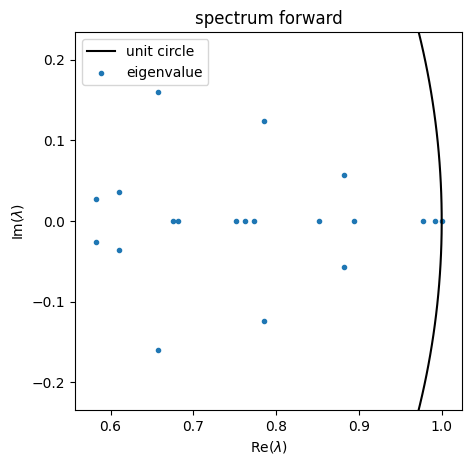

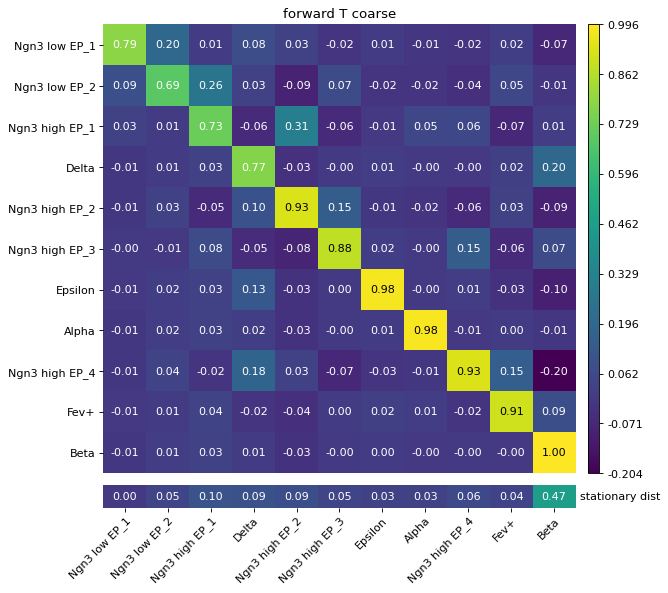

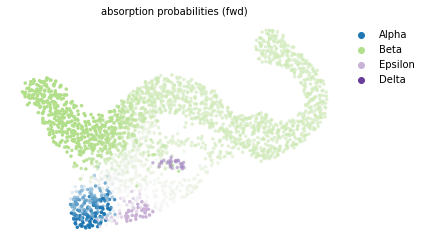

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


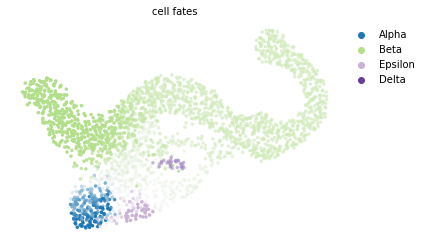

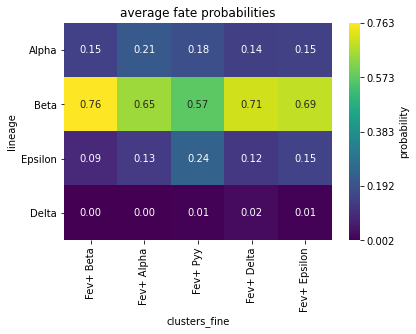

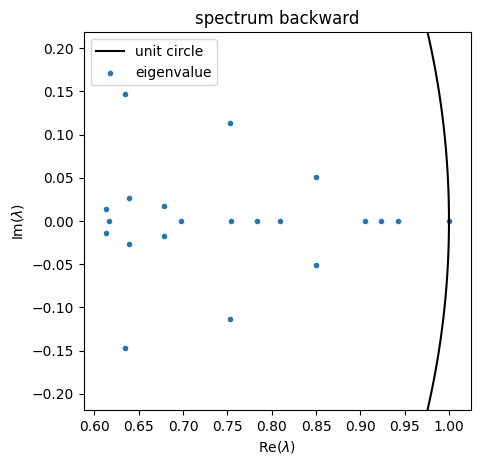

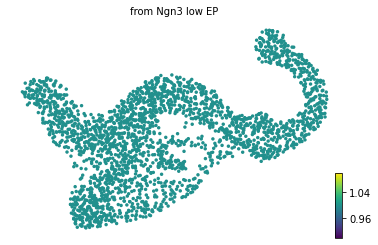

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


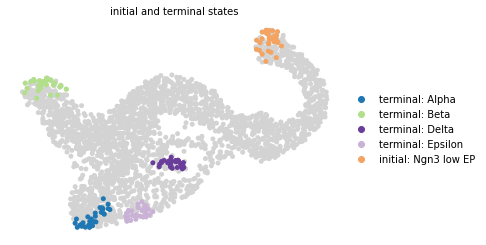

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
No cache found in `pars_knn_30_npcs_30_percd_1_nhvg_3000_minsc_20.pickle`, computing values.
recovering dynamics
    finished (0:14:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure 

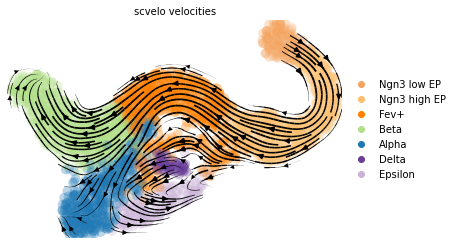

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


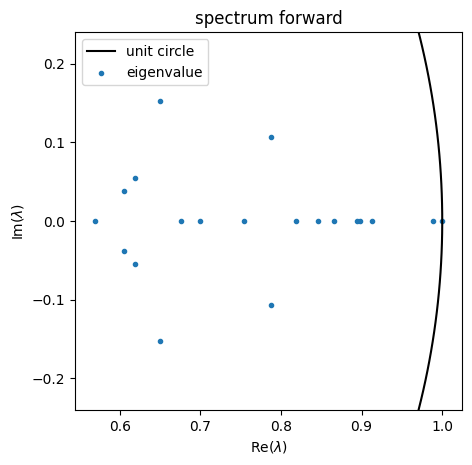

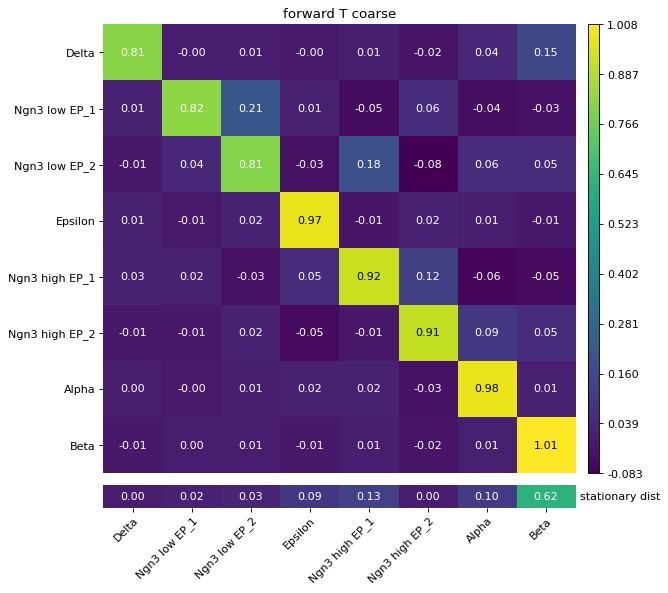

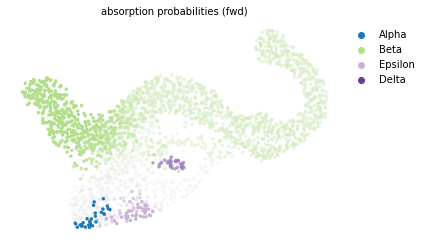

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


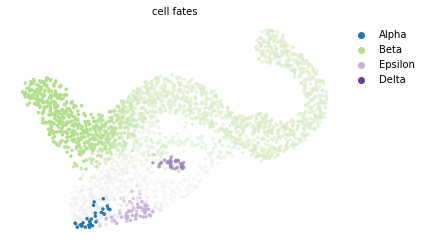

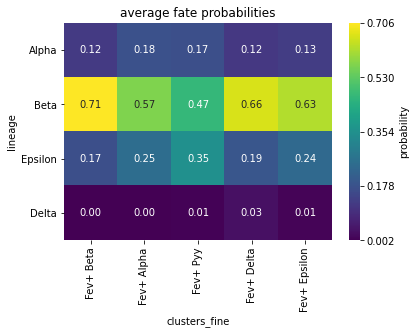

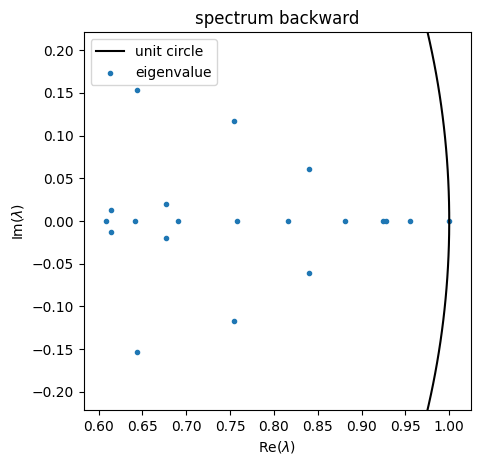

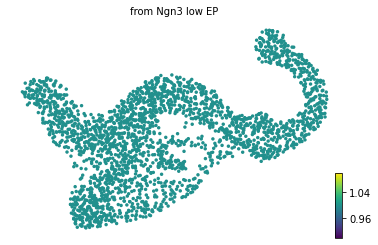

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


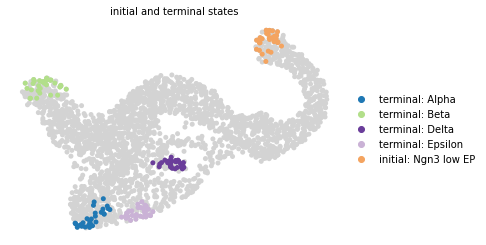

In [7]:
robustness_results = {}
data = {}

for i, value in enumerate([1000, 1500, 2000, 2500, 3000]):
    params, results, g_fwd, _ = run_analysis(adata, 
                                             save_figures=True,
                                             n_top_genes=value,
                                             n_metast_fwd=None,
                                             mode="deterministic",
                                             finst_fwd=['Alpha', 'Beta', 'Epsilon', 'Delta'], 
                                             return_objects=True, 
                                             show_figures=True, 
                                             cache_object=c)
    robustness_results[i] = {**params, **results}
    data[value] = g_fwd
    
with open(DATA_DIR / "benchmarking" / "robustness_analysis" /  "robustness_det" / "n_top_hvgs.pickle", "wb") as fout:
    pickle.dump({'data': data, 'res': robustness_results}, fout)

### Stochastic mode

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1000_minsc_20.pickle`.
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.png


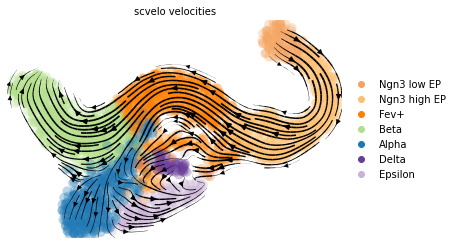

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


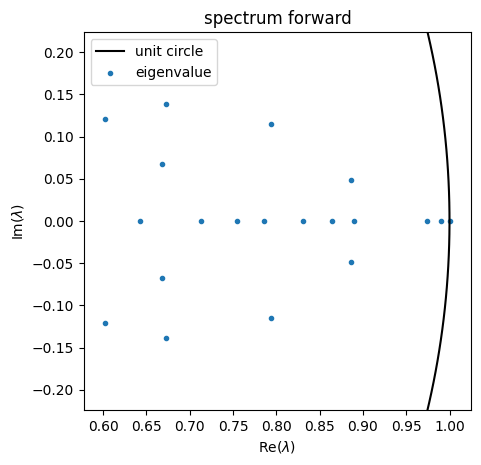

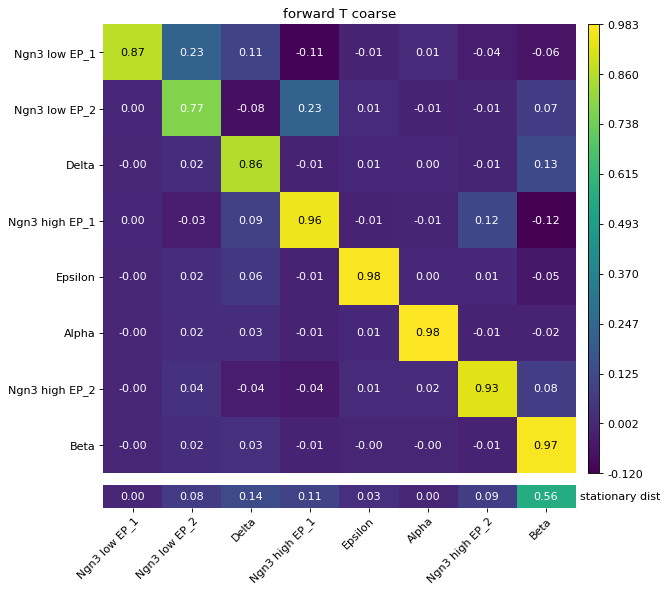

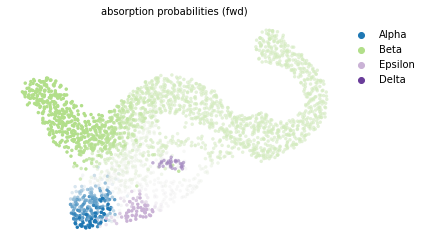

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


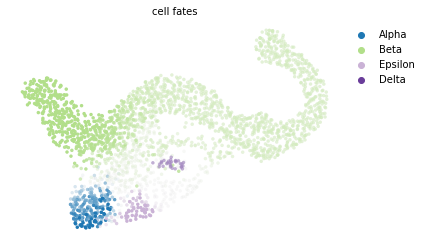

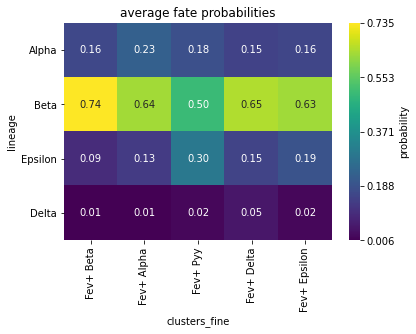

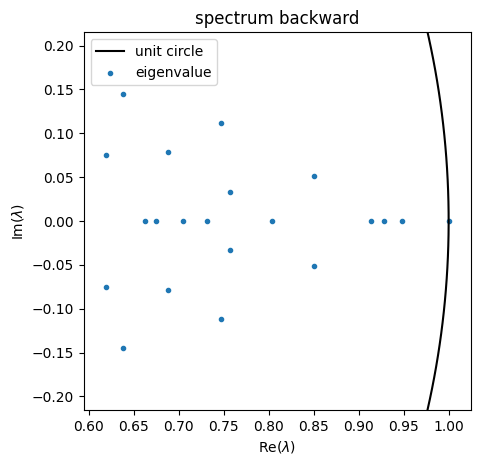

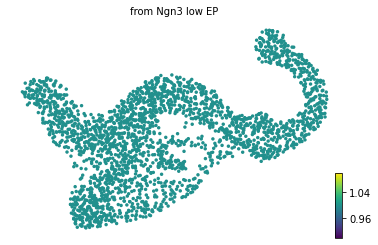

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


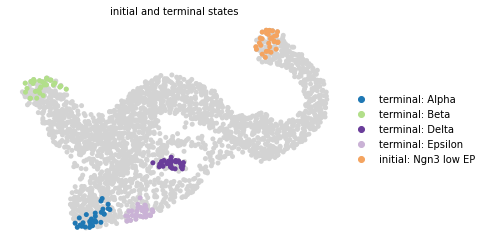

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1500_minsc_20.pickle`.
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.png


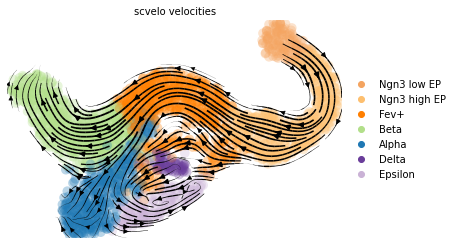

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


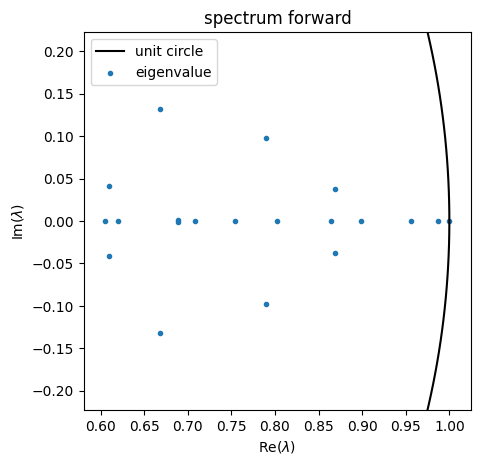

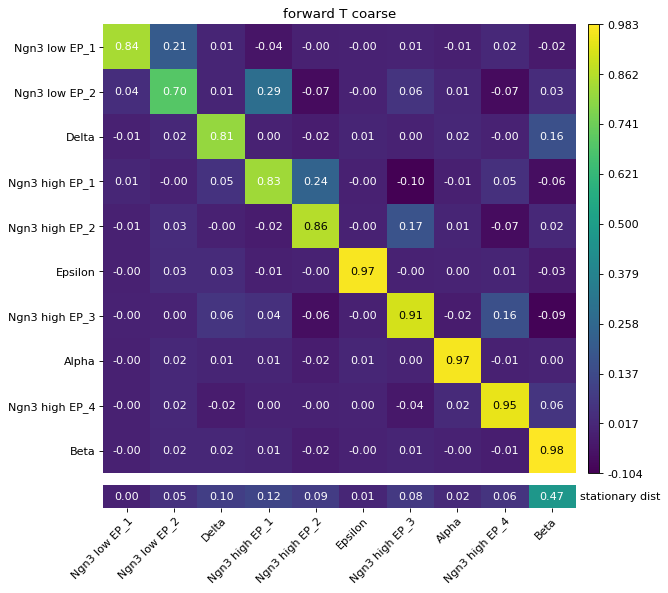

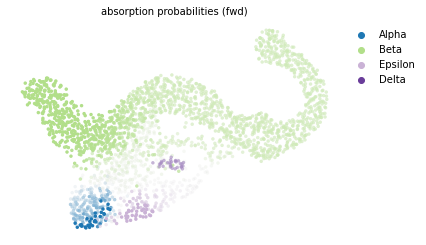

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


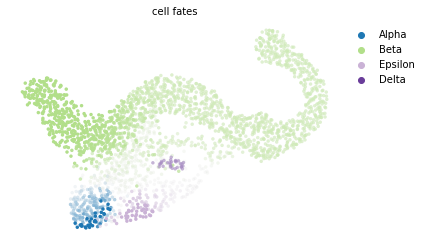

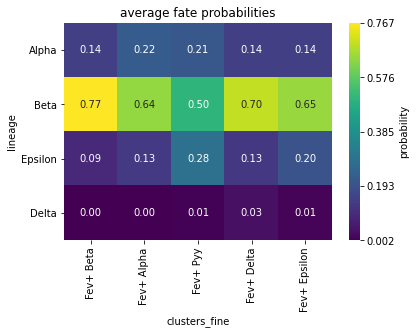

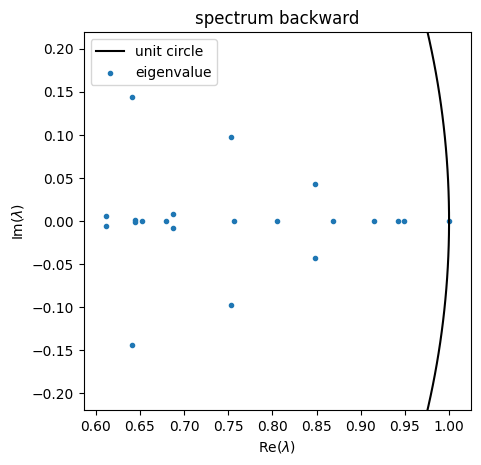

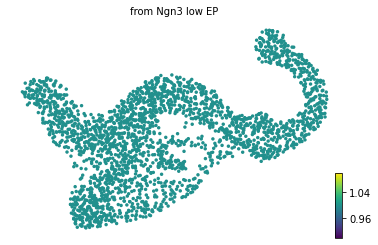

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


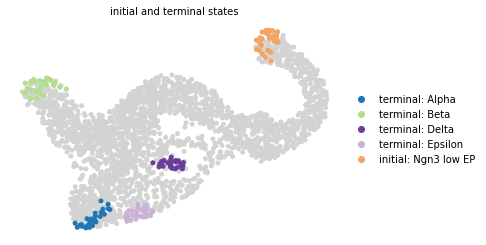

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_2000_minsc_20.pickle`.
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.png


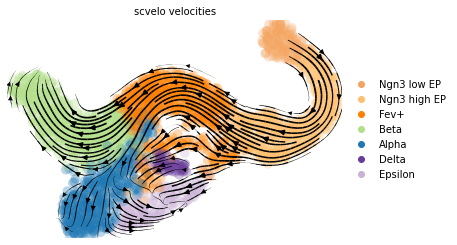

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


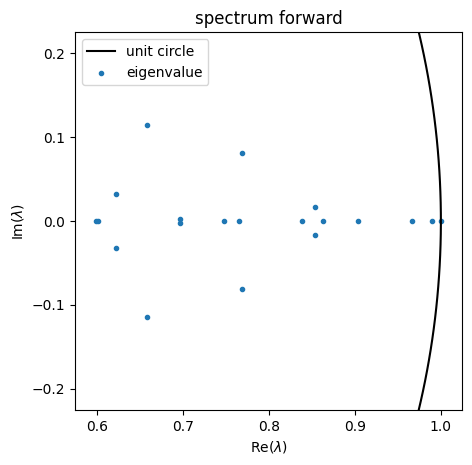

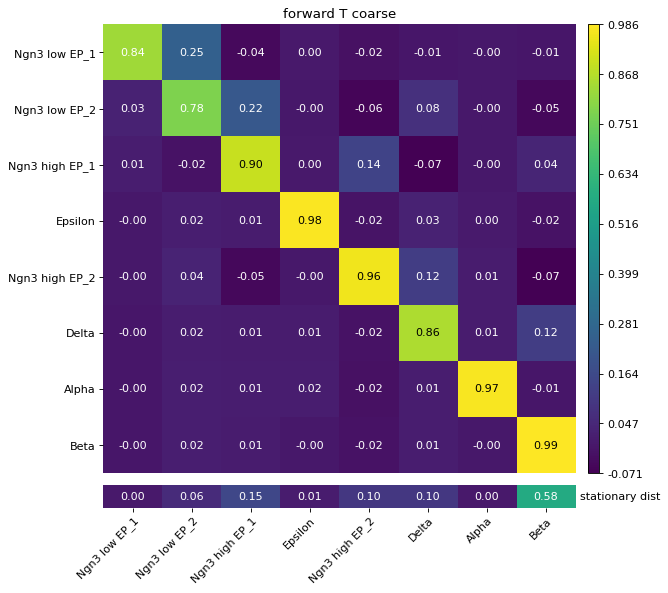

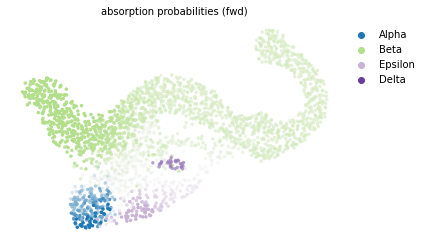

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


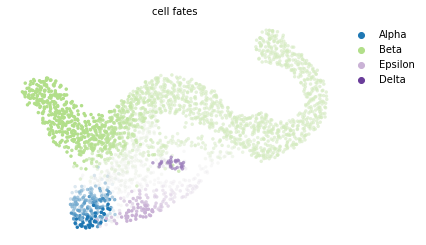

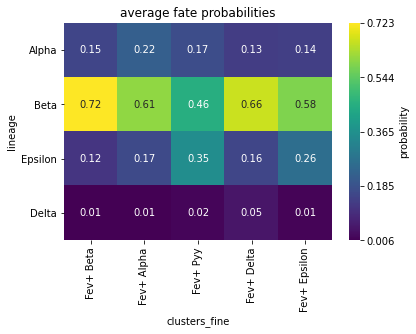

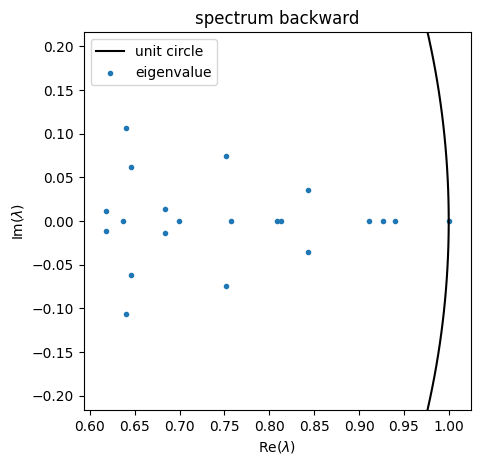

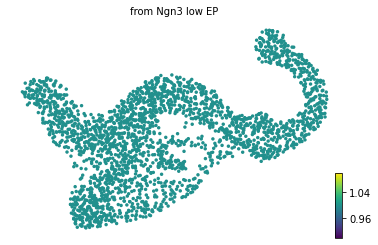

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


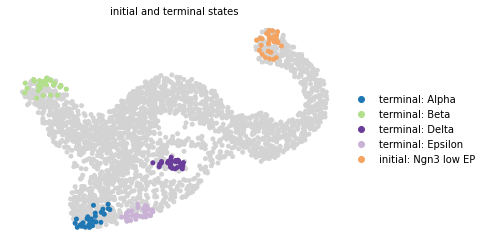

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_2500_minsc_20.pickle`.
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.png


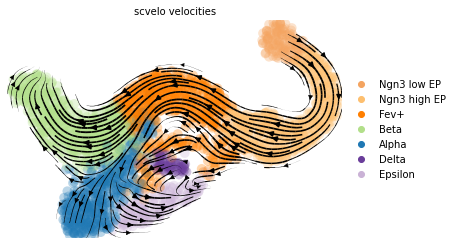

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


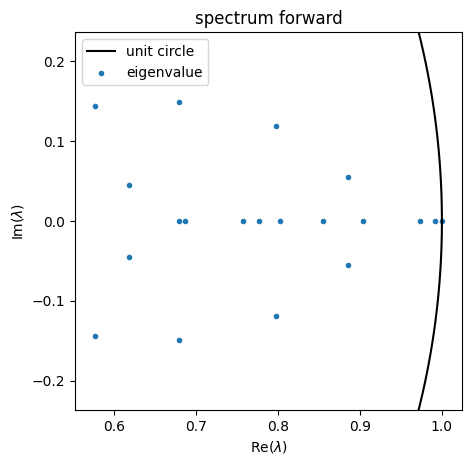

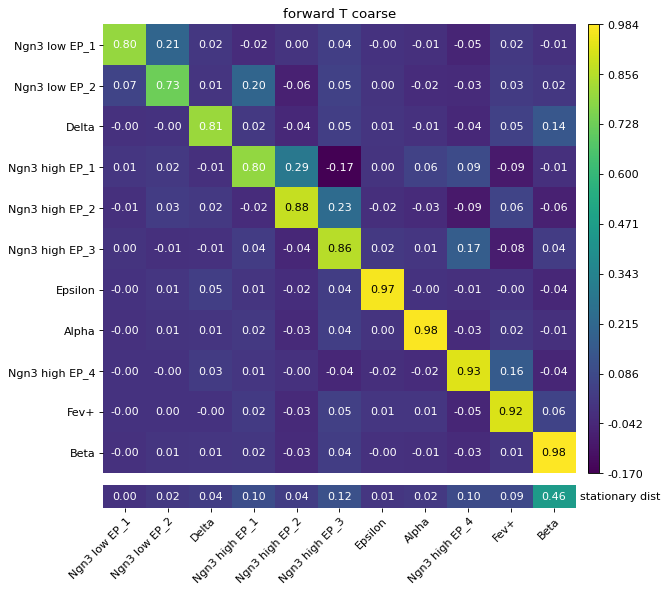

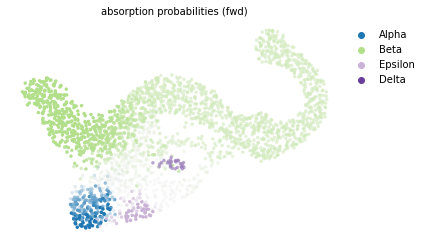

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


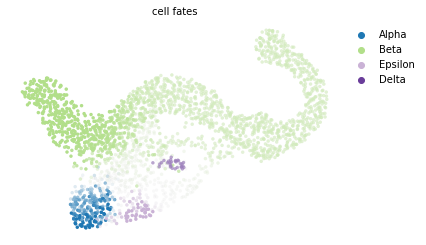

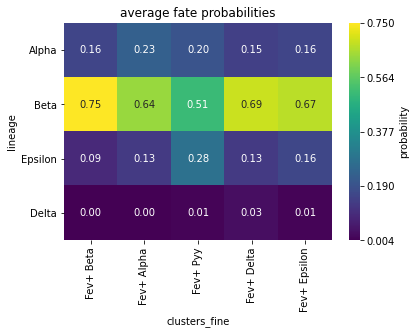

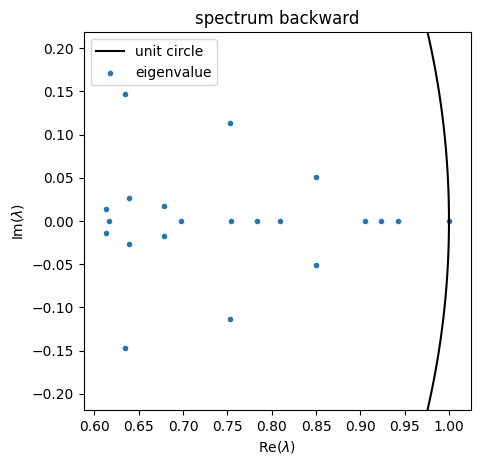

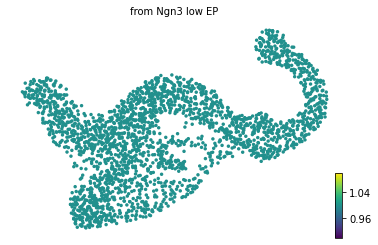

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


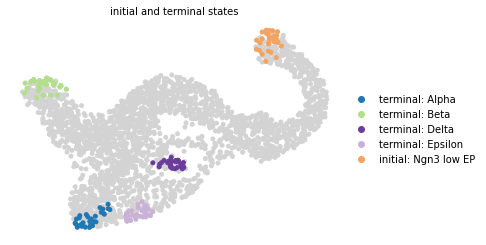

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_3000_minsc_20.pickle`.
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.png


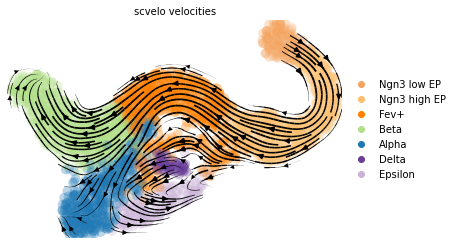

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


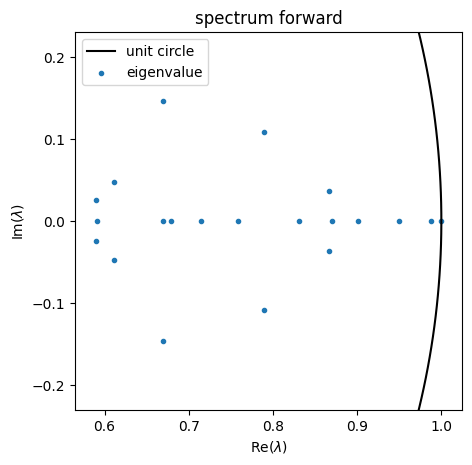

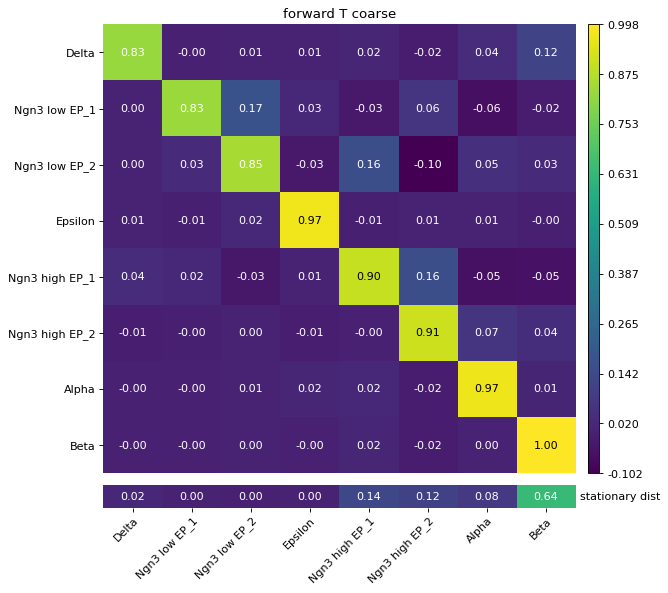

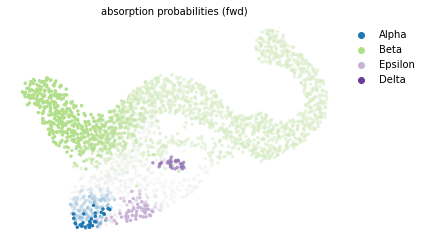

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


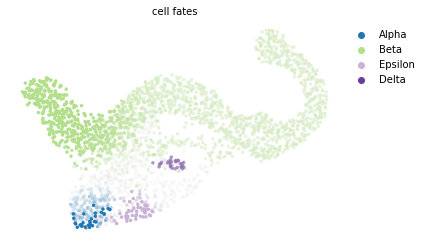

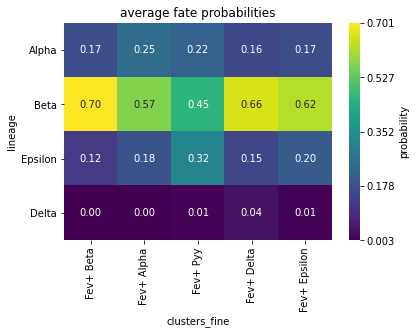

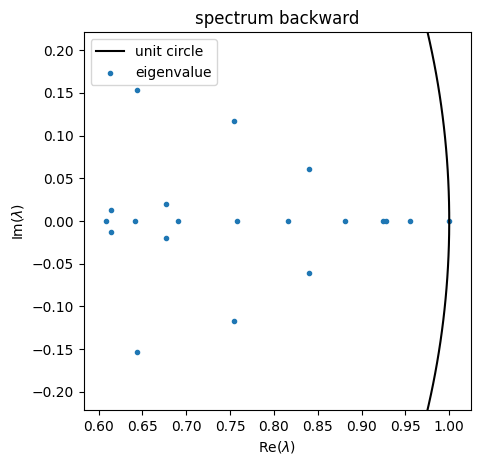

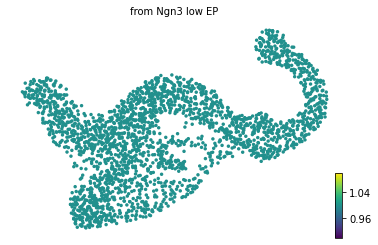

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


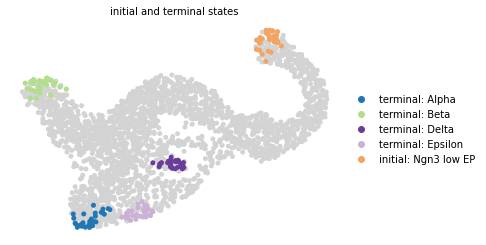

In [8]:
robustness_results = {}
data = {}

for i, value in enumerate([1000, 1500, 2000, 2500, 3000]):
    params, results, g_fwd, _ = run_analysis(adata, 
                                             save_figures=True,
                                             n_top_genes=value,
                                             n_metast_fwd=None,
                                             mode="stochastic",
                                             finst_fwd=['Alpha', 'Beta', 'Epsilon', 'Delta'], 
                                             return_objects=True, 
                                             show_figures=True, 
                                             cache_object=c)
    robustness_results[i] = {**params, **results}
    data[value] = g_fwd
    
with open(DATA_DIR / "benchmarking" / "robustness_analysis" /  "robustness" / "n_top_hvgs.pickle", "wb") as fout:
    pickle.dump({'data': data, 'res': robustness_results}, fout)

## Fixed terminal states

### Deterministic mode

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1000_minsc_20.pickle`.
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.png


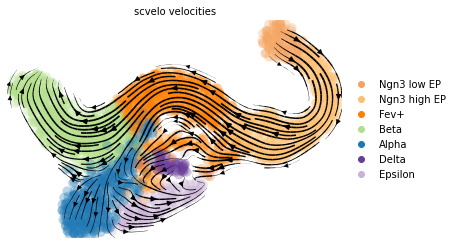

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


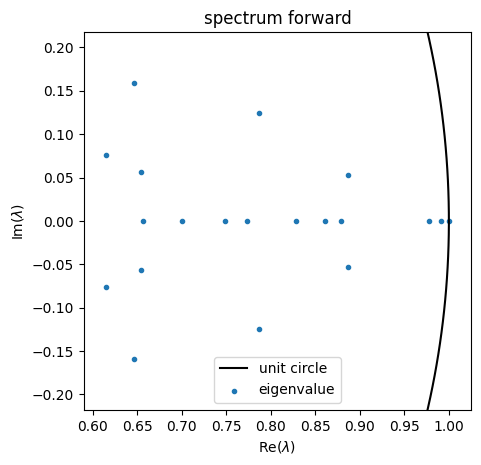

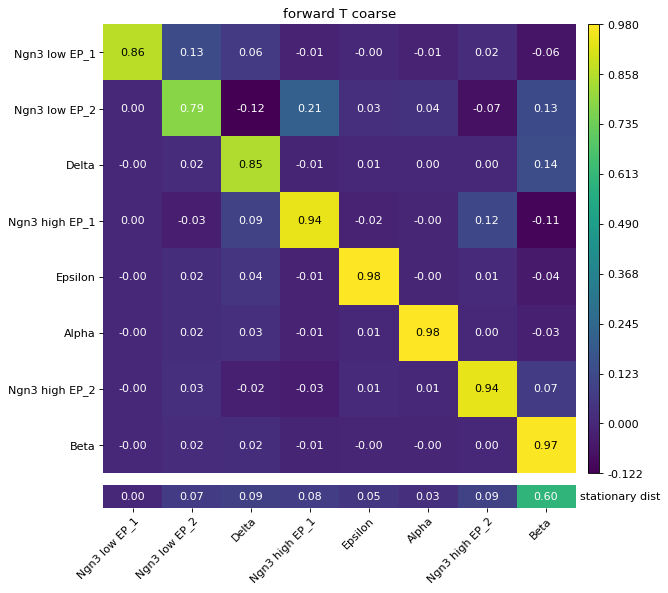

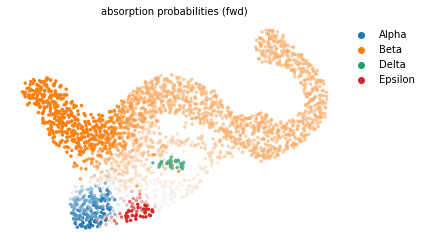

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


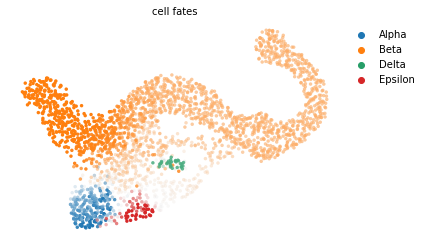

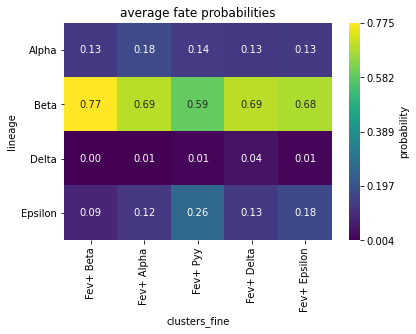

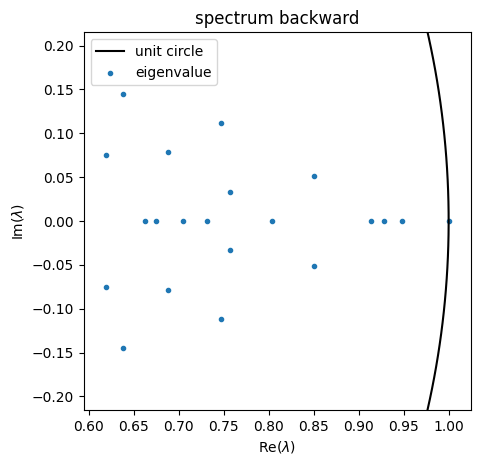

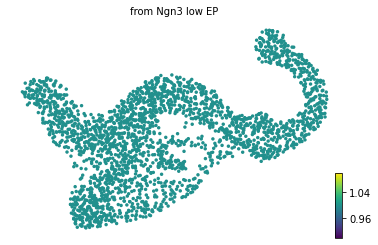

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


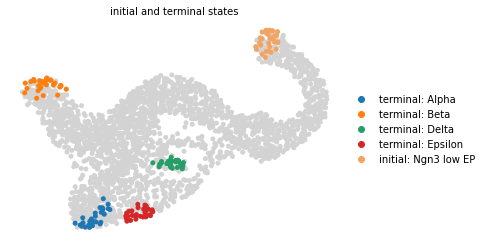

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1500_minsc_20.pickle`.
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.png


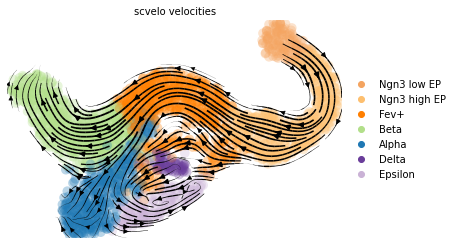

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


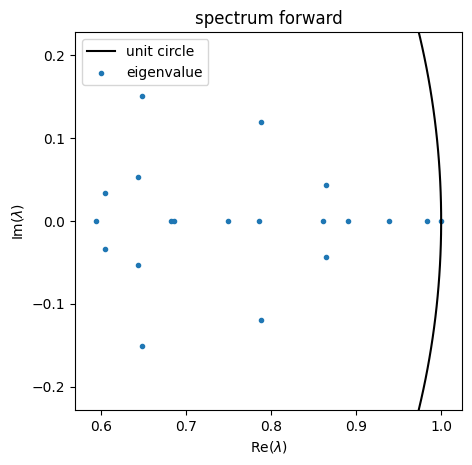

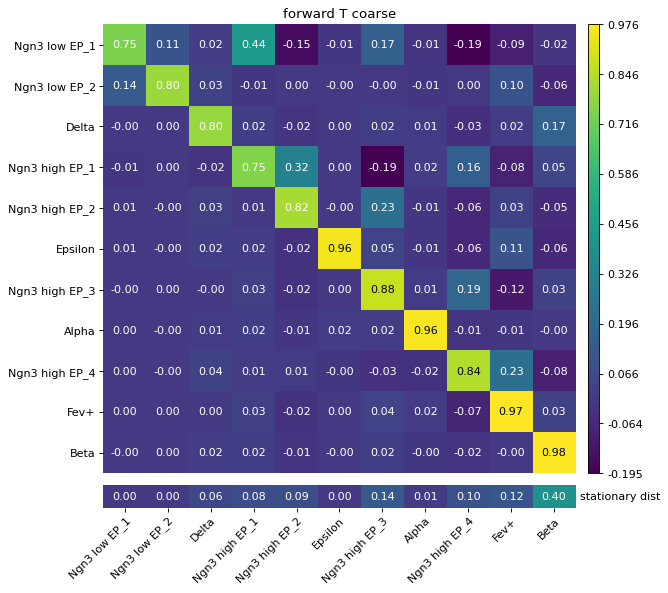

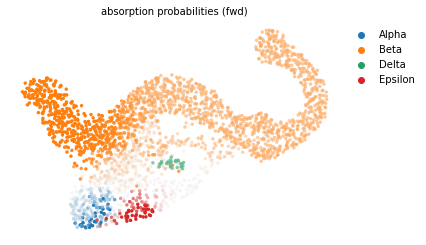

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


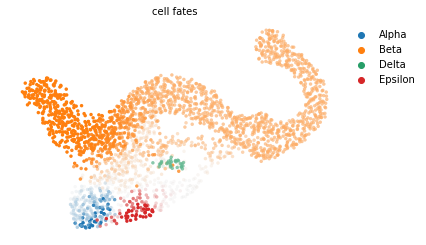

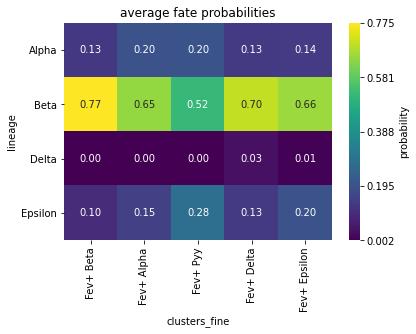

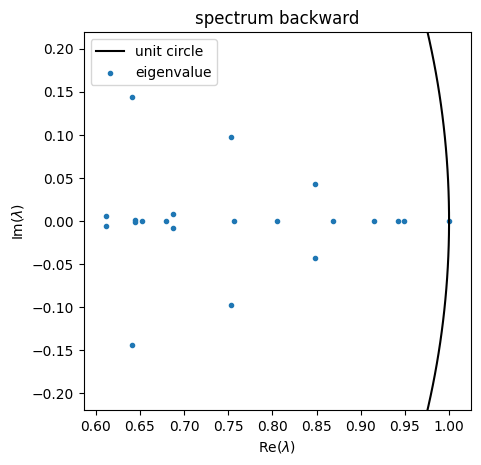

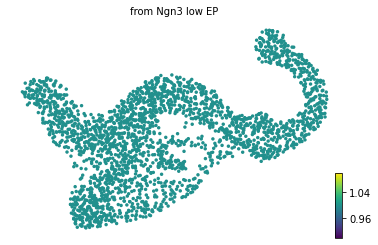

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.pdf


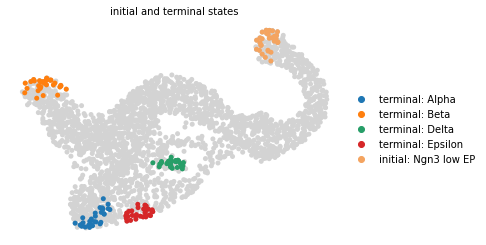

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_2000_minsc_20.pickle`.
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.png


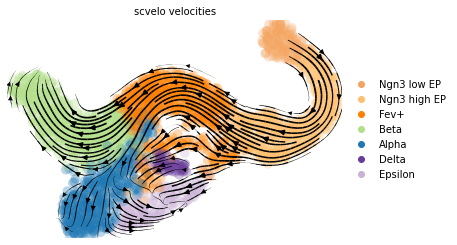

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


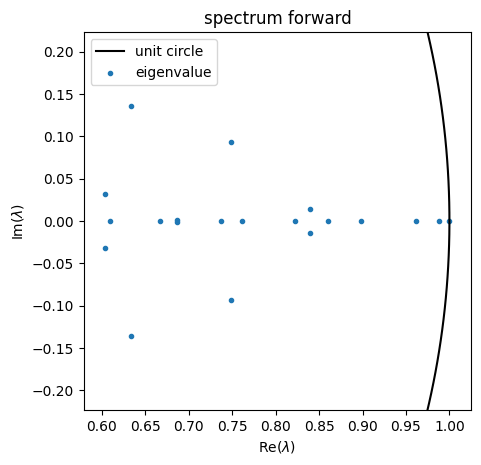

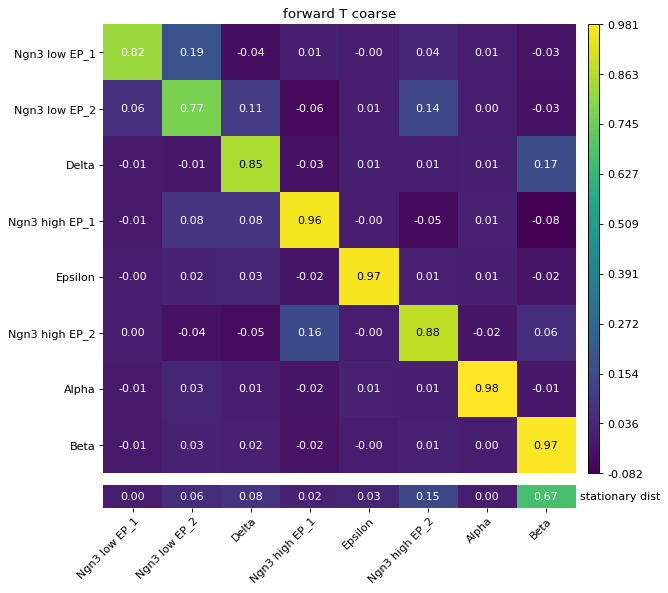

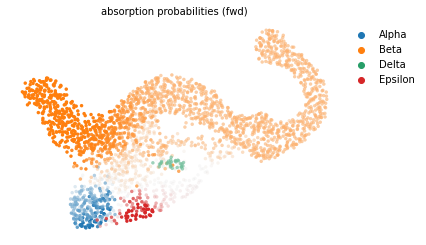

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


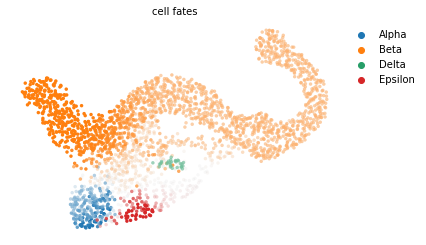

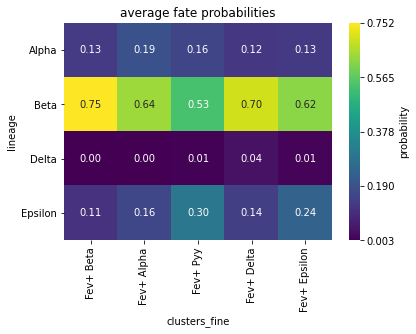

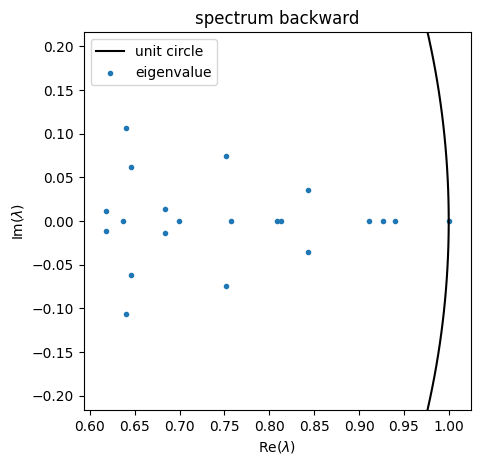

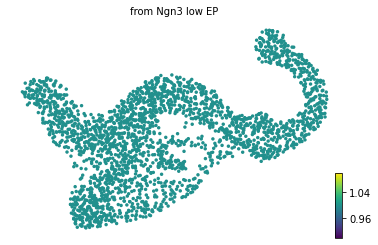

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2000_minsc_20_nstat_None_velo_uncert.pdf


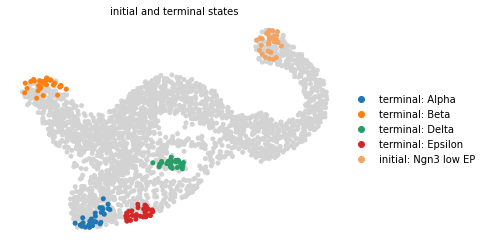

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2500 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_2500_minsc_20.pickle`.
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.png


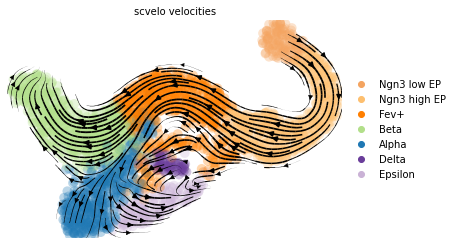

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


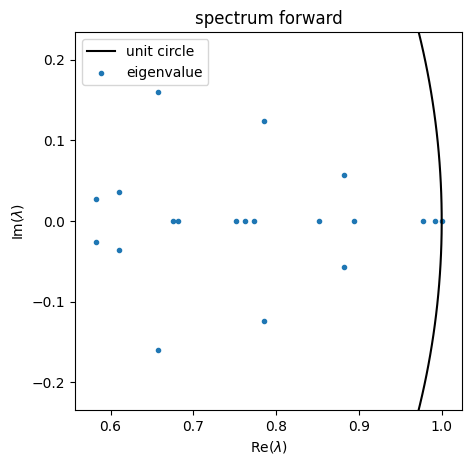

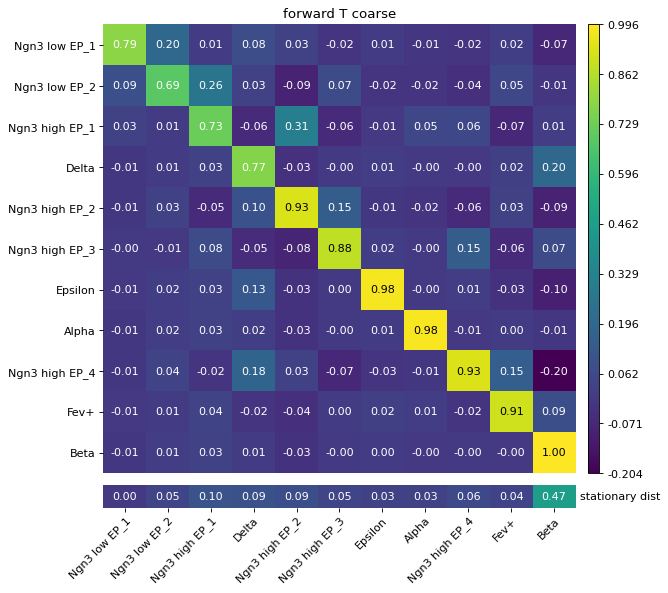

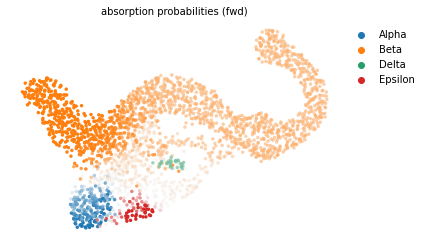

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


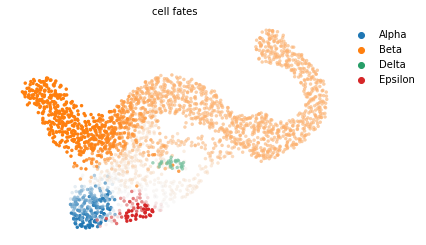

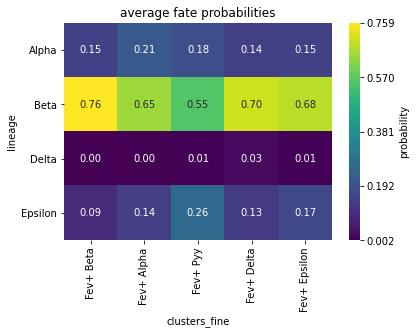

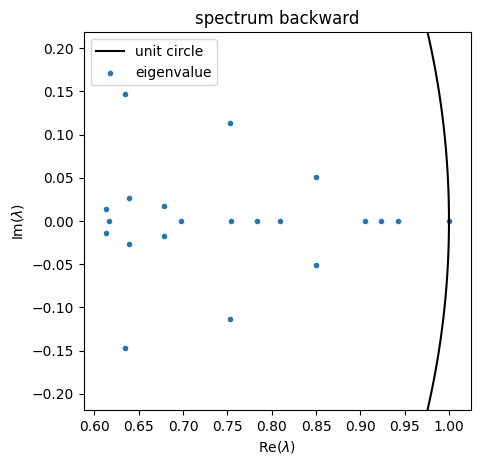

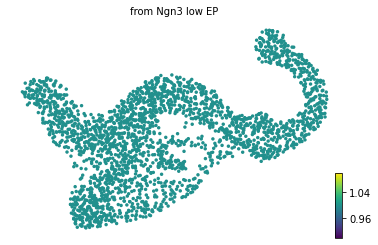

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_2500_minsc_20_nstat_None_velo_uncert.pdf


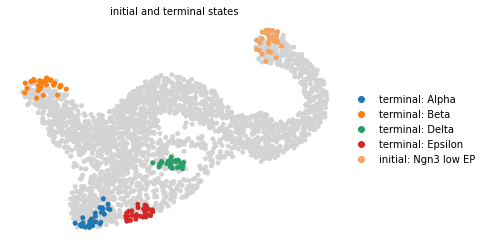

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 3000 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_3000_minsc_20.pickle`.
computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.png


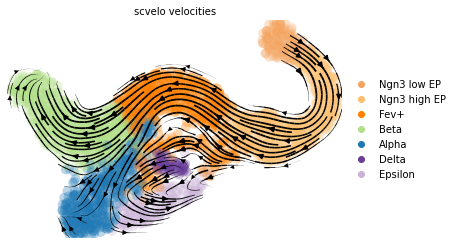

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


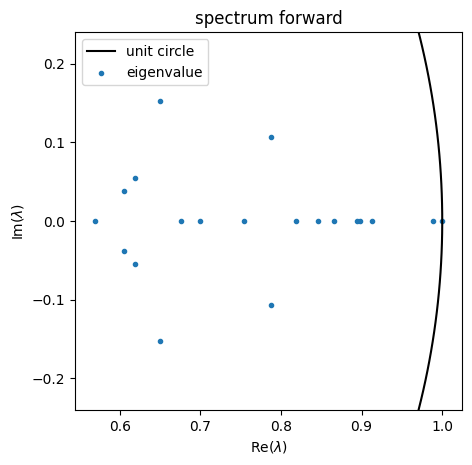

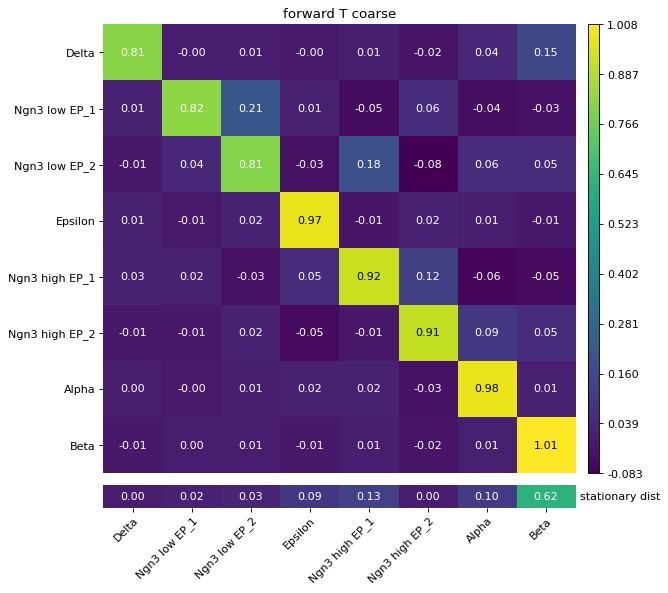

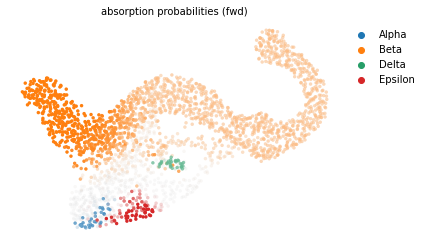

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


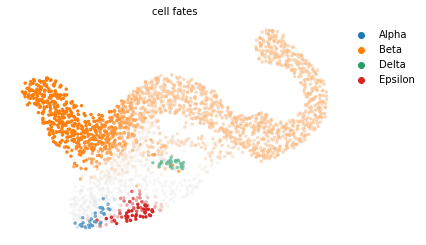

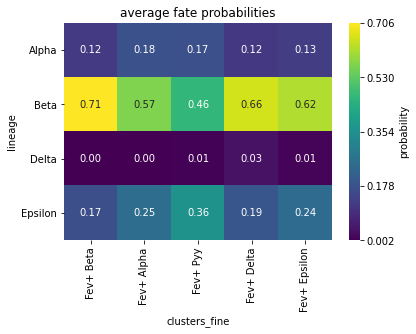

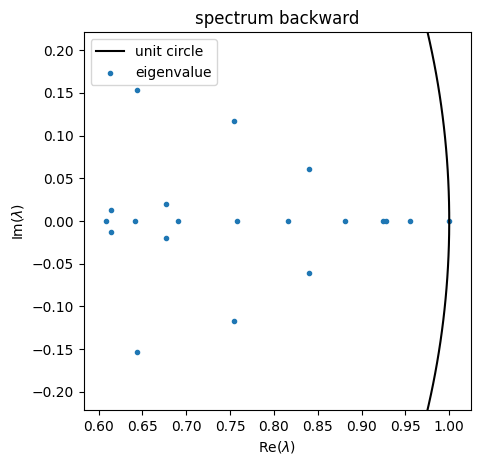

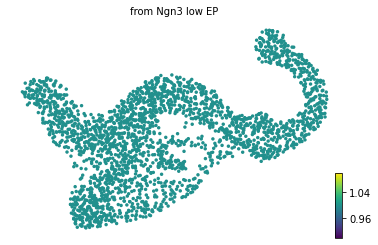

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_3000_minsc_20_nstat_None_velo_uncert.pdf


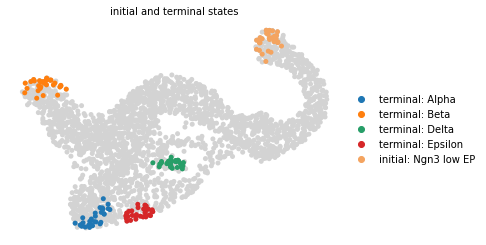

In [7]:
robustness_results = {}
data = {}

for i, value in enumerate([1000, 1500, 2000, 2500, 3000]):
    params, results, g_fwd, _ = run_analysis(adata, 
                                             save_figures=True,
                                             n_top_genes=value,
                                             n_metast_fwd=None,
                                             mode="deterministic",
                                             finst_fwd=term_states,
                                             return_objects=True, 
                                             show_figures=True, 
                                             cache_object=c)
    robustness_results[i] = {**params, **results}
    data[value] = g_fwd
    
with open(DATA_DIR / "benchmarking" / "robustness_analysis" /  "robustness_det_fixed" / "n_top_hvgs.pickle", "wb") as fout:
    pickle.dump({'data': data, 'res': robustness_results}, fout)

### Stochastic mode

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1000_minsc_20.pickle`.
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.png


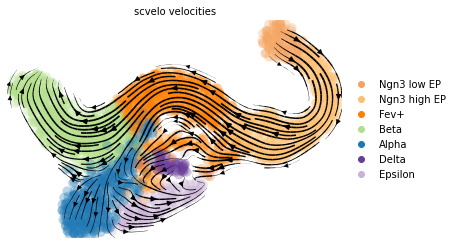

INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition
INFO: Using pre-computed schur decomposition


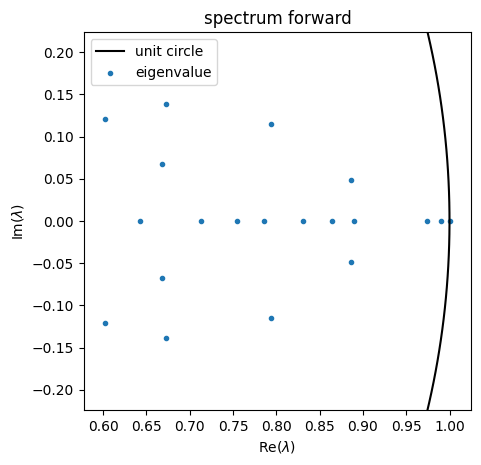

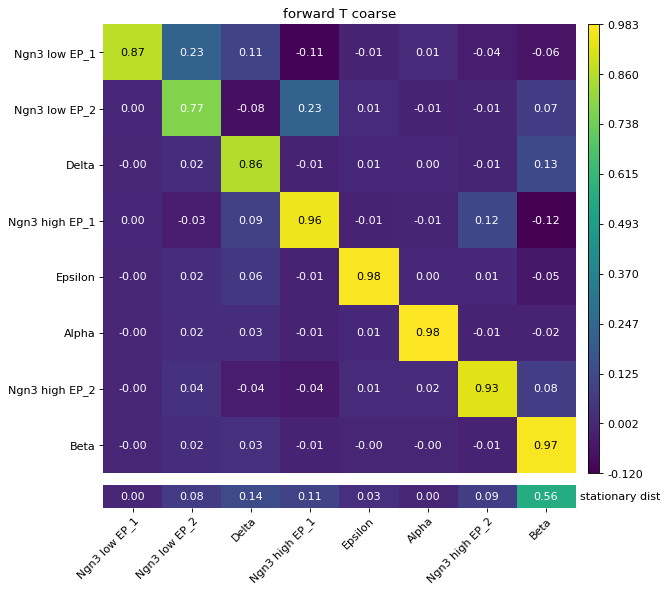

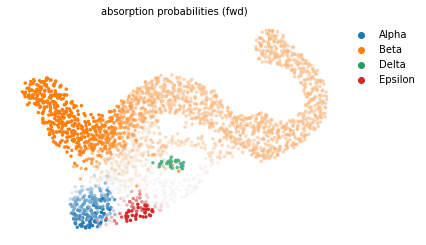

saving figure to file ./figures/scvelo_lin_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


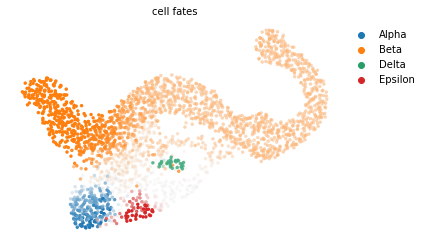

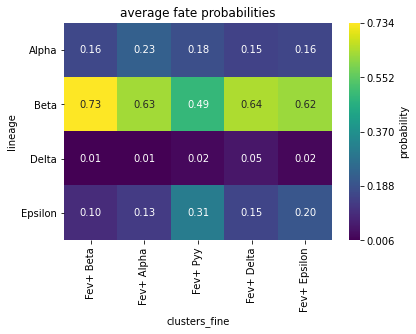

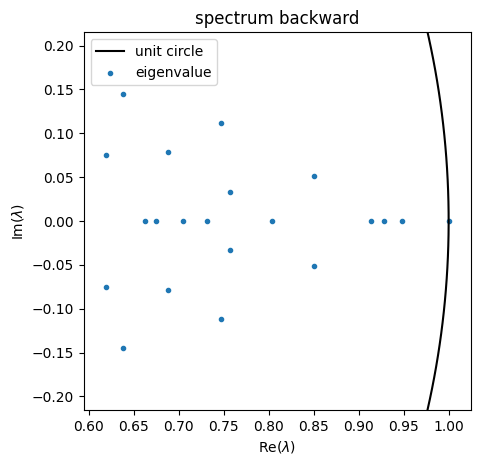

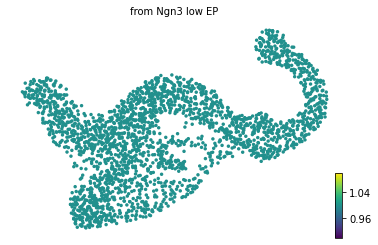

saving figure to file ./figures/scvelo_initial_terminal_knn_30_npcs_30_percd_1_seed_0_nhvg_1000_minsc_20_nstat_None_velo_uncert.pdf


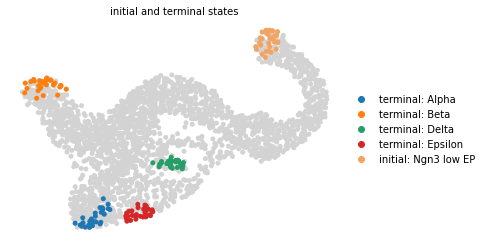

Running the analysis with knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert
Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 1500 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Loading data from: `pars_knn_30_npcs_30_percd_1_nhvg_1500_minsc_20.pickle`.
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:12) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_velocities_knn_30_npcs_30_percd_1_seed_0_nhvg_1500_minsc_20_nstat_None_velo_uncert.png


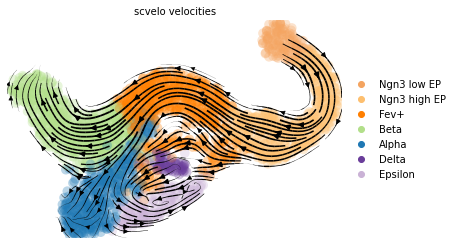

In [ ]:
robustness_results = {}
data = {}

for i, value in enumerate([1000, 1500, 2000, 2500, 3000]):
    params, results, g_fwd, _ = run_analysis(adata, 
                                             save_figures=True,
                                             n_top_genes=value,
                                             n_metast_fwd=None,
                                             mode="stochastic",
                                             finst_fwd=term_states, 
                                             return_objects=True, 
                                             show_figures=True, 
                                             cache_object=c)
    robustness_results[i] = {**params, **results}
    data[value] = g_fwd
    
with open(DATA_DIR / "benchmarking" / "robustness_analysis" /  "robustness_fixed" / "n_top_hvgs.pickle", "wb") as fout:
    pickle.dump({'data': data, 'res': robustness_results}, fout)